# Describe the average diabetic

This is how *I* did the mini-project. This notebook can help if you get stuck, but I really want to encourage you to try doing the project on your own first. Then come back and see what I did.

This is *my* solution, not *the* solution. It's okay if we did things differently as long as we came to the same general conclusions. Your notebook **should not** be the same as mine. Your notebook should be your own solution.

## The Problem

We have data on women that either have diabetes or don't. We'd like to get a picture of the relationship between diabetes diagnosis and the other health factors in our dataset.

Here are specific questions we want to answer:
1. What are the average health metrics for diabetics and non-diabetics?
2. What is the correlation between diabetes diagnosis and the other factors?
3. Which factors seem to be correlated with one another?
4. What is the basic relationship between other health factors and diabetes?

Since this is the very first mini-project, we're going to break it down into steps for you.

## Summary

Blood Glucose is the big differentiator between diabetics and non-diabetics.

We investigated the health factor difference between women who had been diagnosec with diabetes and women who had not by comparing the averages between the two groups, looking for correlation in the dataset, and by making graphs to visualize the relationship between variables.

Nearly all of the health factors have double-digit percent differences between the two groups, with the exception of blood pressure and the ratio of glucose to insulin. Glucose had the highest correlation with diabetes diagnosis, followed by BMI and Age. Insulin, BMI, and Skin Thickness were correlated with each other as well. From the visualizations, the only factor that seemed very different between the two groups was blood glucose. Therefore, we conclude that blood glucose is the big differentiator between diabetics and non-diabetics.

This information is important for personal health management. It tells us that we can limit our likelihood of diabetes by keeping our blood sugar low even if we still struggle with BMI, even if we have lots of kids, and even if diabetes runs in our family.

## Import Packages

In [8]:
# Import the packages you'll need for this project
# I recommend usign pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [9]:
# the data is in a .csv file at the following URL
# it's the github repo that holds all the files for this bootcamp
data_path = "https://raw.githubusercontent.com/JohnTheQuantYoutube/Bootcamp/main/diabetes_data.csv"
data = pd.read_csv(data_path)

## Inspect the Data

In [10]:
# once you've got it loaded, we want to inspect it.
# look at the top few rows of data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# check out the DataFrame info, paying special attention to the data types and number of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The columns appear to have the right data types.
There is a lot of medical information in this dataset that you may not be familiar with. It is a good idea to Google it and know what the data means.
Here's the meaning of each column:

0. Pregnancies
  * The number of pregnancies the person has had. I don't know if this means they gave birth to that number of children or if means all pregnancies regardless of outcome.

1. Glucose
  * This is a blood sugar reading. Glucose is typically measured in milligrams-per-deciliter, (mg/dL), but I don't know if those are the units here.

2. BloodPressure
  * This is a blood pressure reading. Blood pressure usually has two readings: Systolic Blood Pressure is the blood pressure when the heart is beating, usually the top number. Diastolic Blood Pressure is the blood pressure in between heart beats, usually the bottom number. "Normal" blood pressure is 120/80. This appears to be the diastolic blood pressure because the numbers are less than 100.

3. SkinThickness
  * This is some measure of skin thickness. I do not know what the units are, but I assume higher numbers mean thicker skin. This could be related to the Rodnan Skin Score. If so, then zero indicates "normal" skin.

4. Insulin
  * This is a measure of how much insulin is in the person's blood. I am not sure what the units are or what the numbers mean. Be careful interpreting this one.

5. BMI
  * Body Mass Index. This is a measure of how much body fat a person has. The general formula uses weight in kilograms over squared height in meters ($kg / m^2$). 19-24 is "optimal", 25-29 is considered "over-weight", 30 or higher is considered obese. There are levels of obesity as well but I don't think they're important here.

6. DiabetesPedigreeFunction
  * This is the output from a calculation doctor's use to estimate the likelihood of a patient having diabetes based on that patient's family history of diabetes. Higher numbers mean higher likelihood, supposedly.

7. Age
  * Patient age, in years.

8. Outcome
  * Represents whether a person was diagnosed with diabetes. 1 means they have diabetes. 0 means they do ont have diabetes.

## Preprocess the data

"Preprocessing" can mean a lot of things, but the important part is to make the data easier to work with. A few steps are always worthwhile:

* Changing column names to make them easier to type, such as making them all lower case
* Changing columns to the correct data type

In [12]:
# make the column names all lower case
data = data.rename(columns=str.lower)
# change the name of the "outcome" column to "diabetes", so its meaning is more intuitive
data = data.rename(columns={'outcome': 'diabetes'})

## Feature Engineering

Feature Engineering means to use the data we have to generate new measurements that might be more informative. For example, is it more important to know how many pregnancies a woman has had or how quickly those pregnancies happened? We don't know, so we should check both.

Feature Engineering is a creative art. Try to think of a few meaningful ways to combine columns to generate new health factors to investigate.

In [13]:
# think of at least two new features, and make them.
# I gave you one in the blurb above: pregnancies_per_year
data['pregnancies_per_year'] = data['pregnancies'] / data['age']


In [14]:
# I think the relationship between glucose and insulin is probably important
# I am going to make two more features
# this one is the "interaction" term between glucose and insulin <- this kind of "interaction" feature is common in classical statistics
data['glucose_x_insulin'] = data['glucose'] * data['insulin']

# this is my other feature, the ratio of glucose to insulin.
# the calculation involves dividinng by zero, so it creates missing values that I need to fill
# I am going to replace the infinite values with the maximum non-infinite value
data['glucose_over_insulin'] = data['glucose'] / data['insulin']
data['glucose_over_insulin'] = data['glucose_over_insulin'].replace(np.inf,
                                                                    data.loc[data['glucose_over_insulin'] < 99999, 'glucose_over_insulin'].max())

In [15]:
# it's a good idea to look at the data sometimes as you're working
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes,pregnancies_per_year,glucose_x_insulin,glucose_over_insulin
0,6,148,72,35,0,33.6,0.627,50,1,0.120000,0,12.857143
1,1,85,66,29,0,26.6,0.351,31,0,0.032258,0,12.857143
2,8,183,64,0,0,23.3,0.672,32,1,0.250000,0,12.857143
3,1,89,66,23,94,28.1,0.167,21,0,0.047619,8366,0.946809
4,0,137,40,35,168,43.1,2.288,33,1,0.000000,23016,0.815476


# Answering the First Question

## What are the average health metrics for diabetics and non-diabetics?

All of our metrics are numeric, so this should be relatively easy. The hard part is figuring out how to separate the data between diabetic and non-diabetic!

In [16]:
# separate the data into diabetic and non-diabetic
diabetics = data[data['diabetes'] == 1].drop('diabetes', axis=1)
non_diabetics = data[data['diabetes'] == 0].drop('diabetes', axis=1)

In [17]:
# find the mean metrics for the diabetics
d_mean = diabetics.mean(numeric_only=True).rename('diabetics')
d_mean

,diabetics
pregnancies,4.865672
glucose,141.257463
bloodpressure,70.824627
skinthickness,22.164179
insulin,100.335821
bmi,35.142537
diabetespedigreefunction,0.550500
age,37.067164
pregnancies_per_year,0.126491
glucose_x_insulin,15326.638060


In [18]:
# find the mean metrics for non-diabetics
nd_mean = non_diabetics.mean(numeric_only=True).rename('non-diabetics')
nd_mean

,non-diabetics
pregnancies,3.298000
glucose,109.980000
bloodpressure,68.184000
skinthickness,19.664000
insulin,68.792000
bmi,30.304200
diabetespedigreefunction,0.429734
age,31.190000
pregnancies_per_year,0.098411
glucose_x_insulin,8476.122000


In [19]:
# display the two averages next to each other
pd.concat([d_mean, nd_mean], axis=1)

,diabetics,non-diabetics
pregnancies,4.865672,3.298000
glucose,141.257463,109.980000
bloodpressure,70.824627,68.184000
skinthickness,22.164179,19.664000
insulin,100.335821,68.792000
bmi,35.142537,30.304200
diabetespedigreefunction,0.550500,0.429734
age,37.067164,31.190000
pregnancies_per_year,0.126491,0.098411
glucose_x_insulin,15326.638060,8476.122000


In [20]:
# I think it's easier to compare the two if we look at the percent difference
# Percent difference is often more meaningful than absolute difference
# it will help us determine if the difference is large or small
comparison = pd.concat([d_mean, nd_mean], axis=1)
comparison['percent_diff'] = (comparison['diabetics'] - comparison['non-diabetics']) / comparison['non-diabetics']
comparison['percent_diff'] = comparison['percent_diff'] * 100
comparison

,diabetics,non-diabetics,percent_diff
pregnancies,4.865672,3.298000,47.534010
glucose,141.257463,109.980000,28.439228
bloodpressure,70.824627,68.184000,3.872795
skinthickness,22.164179,19.664000,12.714499
insulin,100.335821,68.792000,45.853909
bmi,35.142537,30.304200,15.965897
diabetespedigreefunction,0.550500,0.429734,28.102501
age,37.067164,31.190000,18.843104
pregnancies_per_year,0.126491,0.098411,28.532803
glucose_x_insulin,15326.638060,8476.122000,80.821348


There are only very small differences between the two groups in blood pressure and the ratio of glucose to insulin! That is surprising to me. So is the rather small difference in age. I though age would be a bigger factor.

I am also surprised by the affect that pregnancies seem to have on diabetes. I wonder why that is?  **<- it's useful to find future research opportunities like this**

The rest of the differences were as I generally expected; Insulin has a big difference, glucose and the diabetes pedigree function have a medium difference, age and skin thickness have a small difference

The biggest difference is in the engineered interaction feature. I find that validating.

# Answering the Second Question

## What is the correlation between diabetes diagnosis and the other factors?

On its face, this question only requires one line of code. I challenge you to go further! Find a good way to visualize the correlation.

If you're stuck, try Googling "matplotlib heatmap" and see if you can figure it out. You might also try other graph types, such as a bar chart.

In [21]:
# find the correlation between the diabetes diagnosis and the other columns
corr = data.corr()['diabetes'].drop('diabetes', axis=0)
corr

,diabetes
pregnancies,0.221898
glucose,0.466581
bloodpressure,0.065068
skinthickness,0.074752
insulin,0.130548
bmi,0.292695
diabetespedigreefunction,0.173844
age,0.238356
pregnancies_per_year,0.163744
glucose_x_insulin,0.177786


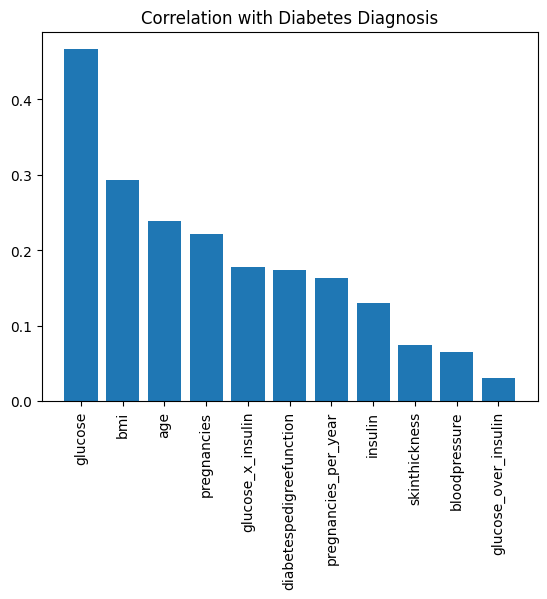

In [22]:
# visualize the correlation somehow
# this is a bar chart, with the bars sorted so the highest value is on the left
plt.title("Correlation with Diabetes Diagnosis")
plt.bar(corr.sort_values(ascending=False).index, corr.sort_values(ascending=False))
plt.xticks(rotation=90);

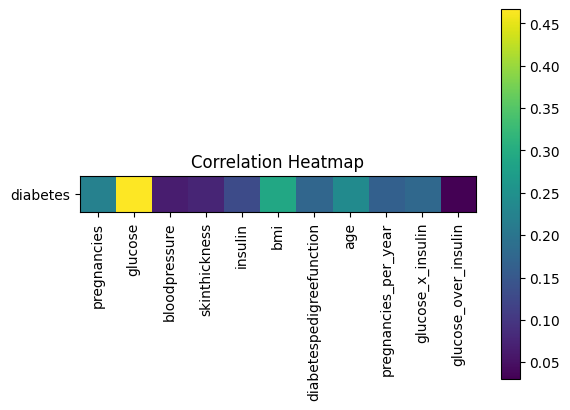

In [23]:
# this is a heatmap
plt.title('Correlation Heatmap')
plt.imshow(corr.to_frame().T)
plt.yticks([0], ['diabetes'])
plt.xticks(np.arange(len(corr.index)), corr.index, rotation=90)
plt.colorbar();

The relationships hinted at here are different in magnitude than those hinted at in Question 1. In Question 1, the interaction term was the biggest difference, but it is right in the middle in terms of correlation. Glucose and BMI had the largest correlations, and I specifically mentioned my surprise at how small the difference was in Question 1!

# Answering the Third Question

## Which factors seem to be correlated with one another?

If you did the last one, you can handle this one. You can do this. It's almost the same question as the last one, just looking at all the columns and not just "diabetes".

In [24]:
# the correlation calculation is basically the same, but without the filters
corr = data.corr()
corr

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes,pregnancies_per_year,glucose_x_insulin,glucose_over_insulin
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.920143,-0.049528,0.166029
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.049125,0.417934,-0.038055
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.045484,0.088307,-0.082791
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.093375,0.391342,-0.556216
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.090136,0.975521,-0.712836
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.022464,0.191614,-0.136215
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.060263,0.184903,-0.157704
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.258233,0.001239,0.204554
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.163744,0.177786,0.030298
pregnancies_per_year,0.920143,0.049125,0.045484,-0.093375,-0.090136,-0.022464,-0.060263,0.258233,0.163744,1.000000,-0.072377,0.152048


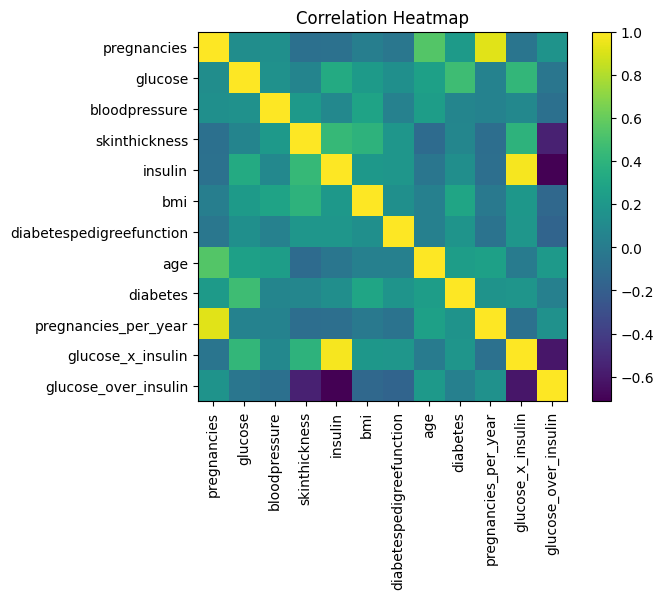

In [25]:
# no bar chart this time
# here is a heatmap
plt.title('Correlation Heatmap')
plt.imshow(corr)
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.colorbar();

# Answering the Fouth Question

## What is the basic relationship between other health factors and diabetes?


For now, we are going to use graphs to answer this question. There are a lot of different kinds of graphs available, and what I want you to do is look through the matplotlib documention and figure out how to make some nice plots.

Here's a link to the documentation (but you should also practice finding it on your own):
https://matplotlib.org/stable/plot_types/index.html

If you're not sure what to do, I'd suggest starting with histograms. I'll do the first histogram for you. Find at least one other plot type that looks nice and is informative (meaning you can look at it and explain what it means). Under each graph, give a brief summary of what the graph tells us!

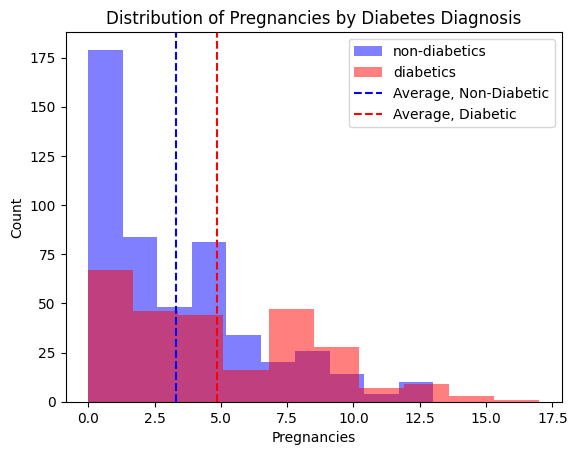

In [26]:
# first histogram
plt.hist(data.loc[data['diabetes'] == 0, 'pregnancies'], color='blue', alpha=0.5, label='non-diabetics')
plt.hist(data.loc[data['diabetes'] == 1, 'pregnancies'], color='red', alpha=0.5, label='diabetics')
plt.title('Distribution of Pregnancies by Diabetes Diagnosis')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.axvline(data.loc[data['diabetes'] == 0, 'pregnancies'].mean(), color='blue', linestyle='dashed', label='Average, Non-Diabetic')
plt.axvline(data.loc[data['diabetes'] == 1, 'pregnancies'].mean(), color='red', linestyle='dashed', label='Average, Diabetic')
plt.legend();

The chart above tells us two important things.
1. The lines that represent the average tell us that, while the average number of pregnancies is higher among diabetics, it doesn't look all that different from the average of non-diabetics. We already knew the average was different, but this shows us that it doesn't look like there's as much of a difference as we guessed. Maybe there's another relationship here? My guess is that people with more pregnancies have higher BMI and therefore are more likely to be diabetic. My guess is that it isn't the pregnancies, but the often associated weight gain. We can investigate this with a scatter plot.
2. The bars of the histogram show us that the number of pregnancies is more varied (wider) among diabetics. My guess is that older people are more likely to be diabetic and also more likely to have more pregnancies. Again, we will investigate with a scatterplot.

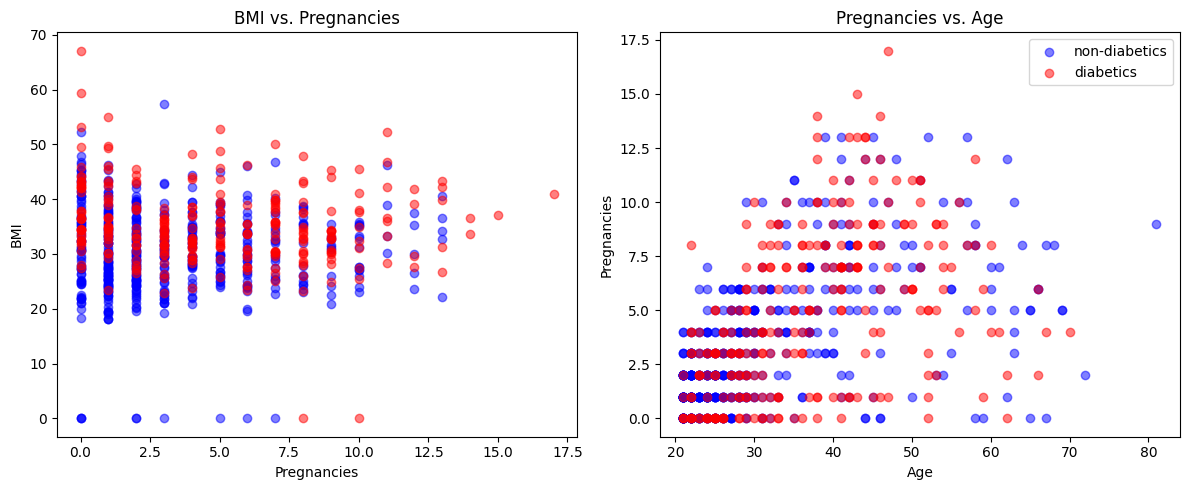

In [27]:
# here are two scatterplots to investigate the questions from the histogram summary
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].scatter(x=data.loc[data['diabetes'] == 0, 'pregnancies'], y=data.loc[data['diabetes'] == 0, 'bmi'], color='blue', alpha=0.5, label='non-diabetics')
ax[0].scatter(x=data.loc[data['diabetes'] == 1, 'pregnancies'], y=data.loc[data['diabetes'] == 1, 'bmi'], color='red', alpha=0.5, label='diabetics')
ax[0].set_title('BMI vs. Pregnancies')
ax[0].set_xlabel('Pregnancies')
ax[0].set_ylabel('BMI')

ax[1].scatter(x=data.loc[data['diabetes'] == 0, 'age'], y=data.loc[data['diabetes'] == 0, 'pregnancies'], color='blue', alpha=0.5, label='non-diabetics')
ax[1].scatter(x=data.loc[data['diabetes'] == 1, 'age'], y=data.loc[data['diabetes'] == 1, 'pregnancies'], color='red', alpha=0.5, label='diabetics')
ax[1].set_title('Pregnancies vs. Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Pregnancies')
ax[1].legend()
fig.tight_layout();

Interestingly, the number of pregnancies does not seem to have any relationship with BMI. The dots are relatively flat and there is not really any separation between red and blue dots.

While there does seem to be a little bit of a relationship between pregnancies and age, there doesn't seem to be any separation between red and blue dots, so we can't tell anything from the scatterplot about diabetes.

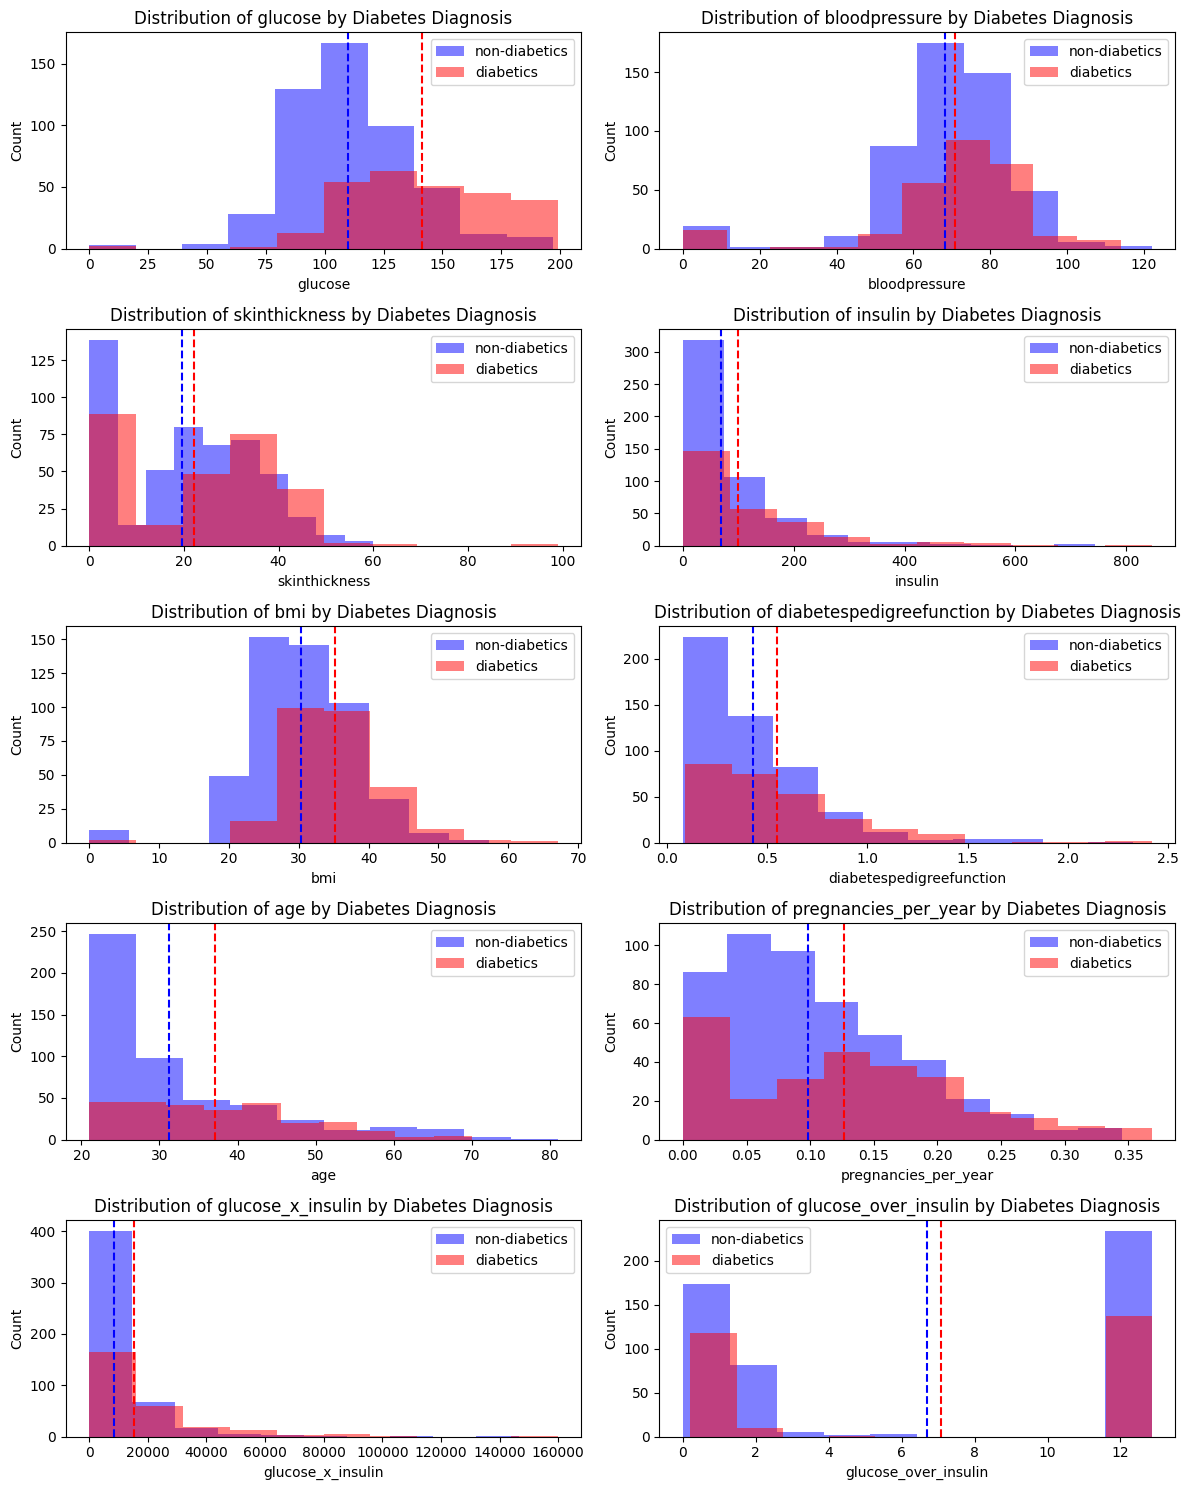

In [28]:
# the rest of the histograms
# I'm going to make the rest of the histograms all at once.

# we need to make 10 graphs (there are 12 columns, but we've already done pregnancies and we don't do diabetes)
# let's do 2 columns and 5 rows (2 x 5 = 10)
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(12, 15))


i = 0 # this will help us track which subplot we're using
# loop through the columns of the DataFrame
for col in data.columns:
  if (col == 'diabetes') or (col == 'pregnancies'):
    continue # continue means to go to the next step in the loop

  # the math here is a little more advances
  # i // 2 <- "//" is whole-number division, or division without the remainder. E.g., 4 // 2 = 2, 5 // 2 = 2, 6 // 2 = 3, 7 // 2 = 3, and so on
  # i % 2 <- "%" this is the "mod" operator, which returns the remainder. E.g., 4 % 2 = 0, 5 % 2 = 1, 6 % 2 = 0, 7 % 2 = 1, and so on
  # putting them together, [i // 2, i % 2] is going to return:
  #       i = 4    ->   [4 // 2, 4 % 2] = [2, 0]
  #       i = 5    ->   [5 // 2, 5 % 2] = [2, 1]
  #       i = 6    ->   [6 // 2, 6 % 2] = [3, 0]
  #       i = 7    ->   [7 // 2, 7 % 2] = [3, 1]

  ax[i // 2, i % 2].hist(data.loc[data['diabetes'] == 0, col], color='blue', alpha=0.5, label='non-diabetics')
  ax[i // 2, i % 2].hist(data.loc[data['diabetes'] == 1, col], color='red', alpha=0.5, label='diabetics')
  ax[i // 2, i % 2].axvline(data.loc[data['diabetes'] == 0, col].mean(), color='blue', linestyle='dashed')
  ax[i // 2, i % 2].axvline(data.loc[data['diabetes'] == 1, col].mean(), color='red', linestyle='dashed')

  ax[i // 2, i % 2].set_title(f'Distribution of {col} by Diabetes Diagnosis')
  ax[i // 2, i % 2].set_xlabel(col)
  ax[i // 2, i % 2].set_ylabel('Count')
  ax[i // 2, i % 2].legend()
  i += 1 # move on to the next plot
fig.tight_layout();

The histogram that shows the biggest difference between diabetic and non-diabetic people is Glucose. Diabetic and non-diabetic people clearly have different blood glucose readings, with diabetic readings being higher.

The rest of the histograms are pretty similar, although you could argue that any of them are *different enough*.

Whatever you said in your explanations of your graphs, as long as you can support your statements, you're right.

# Conclusion

The most important thing we learned in this mini-project is that blood glucose seems to have the strongest relationship with diabetes. This makes sense, because glucose is a measure of sugar in the blood and we know that diabetes is a blood-sugar problem. Surprisingly, all of the other health factors were pretty different between diabetics and non-diabetics. We can't say whether they are *significantly different* yet. We'll learn how to do that in Week 4.

We also learned that BMI is correlated with diabetes diagnosis, and that BMI and Insulin are correlated with Skin Thickness but not so much with diabetes itself.

The last important thing that we learned is that, with the exception of glucose, the distribution of health factors is not very different between diabetic and non-diabetic people.